## 예측 결과를 바탕으로 10월 22일부터 투자 했을 시의 수익률 결과

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

yg = pd.read_csv('YG_predictions.csv')
sm = pd.read_csv('SM_predictions.csv')
jyp = pd.read_csv('JYP_predictions.csv')
hybe = pd.read_csv('HYBE_predictions.csv')

### YG 주가 데이터 

In [121]:
# 해당 데이트 종가에 사서 다음날 종가에 팔았을 경우의 수익률
yg['return_rate'] = yg['real_close'].pct_change(1).shift(-1)
yg.set_index('date',inplace=True)

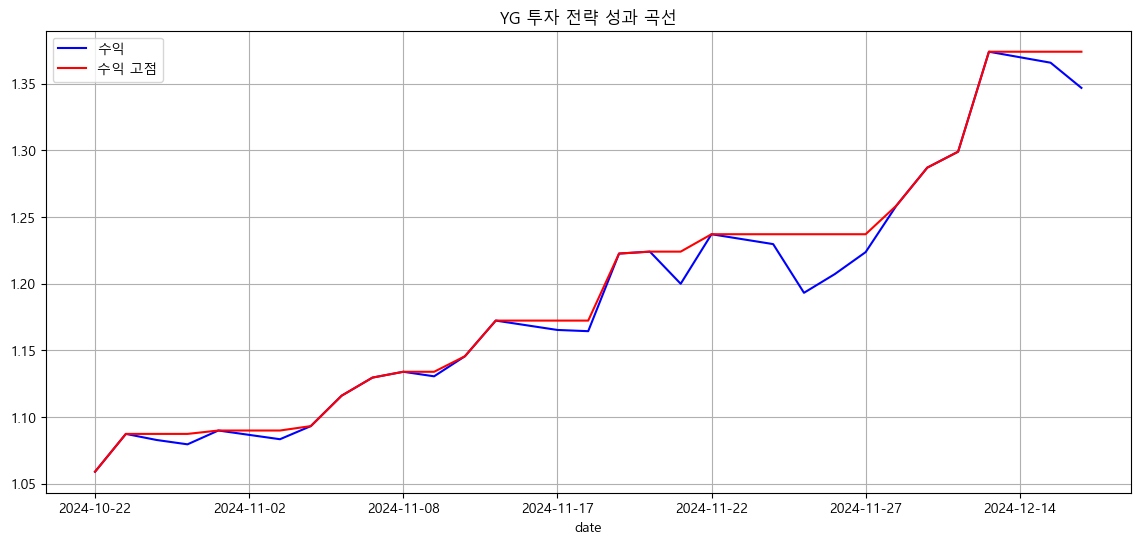

In [122]:
# 매수한 경우의 수익률만 확인
yg_buy =yg[yg['up_down']=='상승']

# 레포트 및 성과지표 생성
all_return = pd.Series(yg_buy['return_rate'], index=yg_buy.index) - 0.003  # 매매비용
cumulative_return = (all_return + 1.).cumprod() #누적 수익 계산

cumulative_high = cumulative_return.cummax() # 누적 수익의 최고점들을 이은 선 계산을 위해
mdd = cumulative_return / cumulative_high # 최대 낙폭 계산, 누적 수익률이 최고점 대비 몇 퍼센트인지를 나타냄

cumulative_return.plot(label = '수익',color = 'b');
cumulative_high.plot(figsize=(14,6), grid=True, label='수익 고점',color='r');

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.title(r'YG 투자 전략 성과 곡선')
plt.legend();

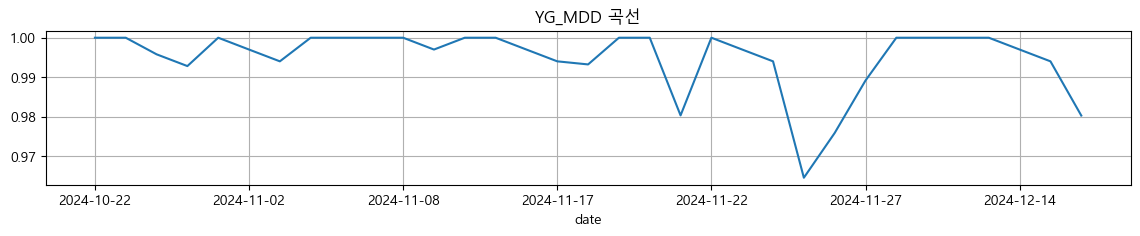

In [123]:
mdd.plot(figsize=(14,2), grid=True, title='YG_MDD 곡선');

In [124]:
print(f"YG 전체 기간 수익률 <{cumulative_return.index[0]} ~ {cumulative_return.index[-1]}>: {cumulative_return.iloc[-1]-1:.2%}")
print(f"YG 평균 주기수익률: {all_return.mean() : .2%}") 
print(f"YG 연평균 수익률: {((all_return.mean() + 1) ** 4) - 1 :.2%}")
print(f"YG 승률: {(all_return > 0).sum() / len(all_return) :.2%}")
print(f"YG 최대 낙폭 MDD: {mdd.min() - 1:.2%}")

YG 전체 기간 수익률 <2024-10-22 ~ 2024-12-23>: 34.68%
YG 평균 주기수익률:  0.93%
YG 연평균 수익률: 3.75%
YG 승률: 54.55%
YG 최대 낙폭 MDD: -3.55%


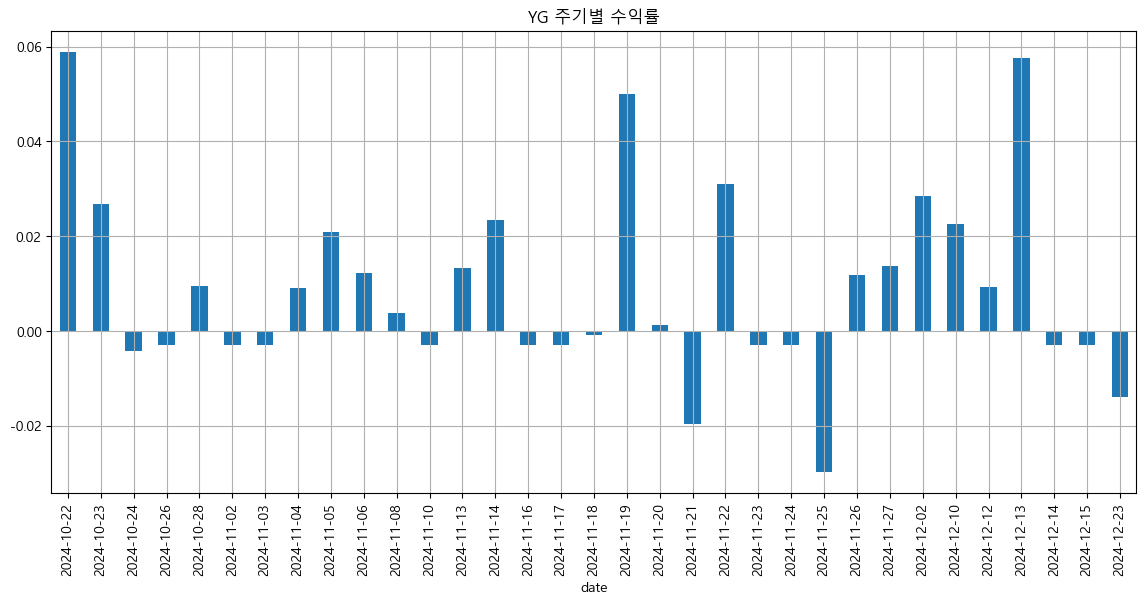

In [125]:
all_return.plot(kind='bar', grid=True, figsize=(14,6), title='YG 주기별 수익률');

### SM 주가 데이터

In [126]:
sm['return_rate'] = sm['real_close'].pct_change(1).shift(-1)
sm.set_index('date',inplace=True)

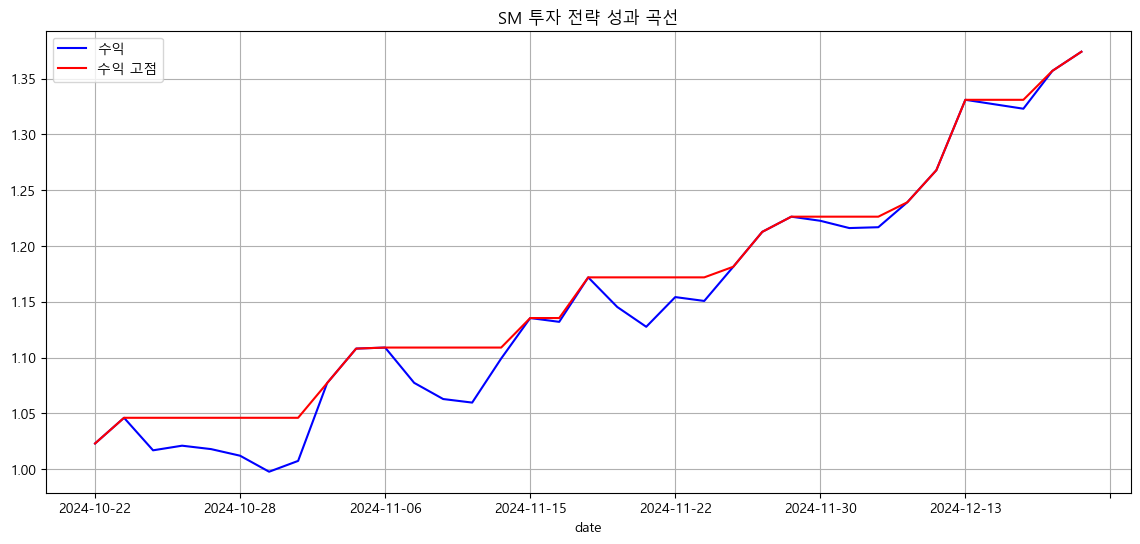

In [127]:
# 매수한 경우의 수익률만 확인
sm_buy =sm[sm['up_down']=='상승']

# 레포트 및 성과지표 생성
all_return = pd.Series(sm_buy['return_rate'], index=sm_buy.index) - 0.003
cumulative_return = (all_return + 1.).cumprod()

cumulative_high = cumulative_return.cummax()
mdd = cumulative_return / cumulative_high

cumulative_return.plot(label = '수익',color='b');
cumulative_high.plot(figsize=(14,6), grid=True, label='수익 고점',color='r');

plt.title(r'SM 투자 전략 성과 곡선')
plt.legend();

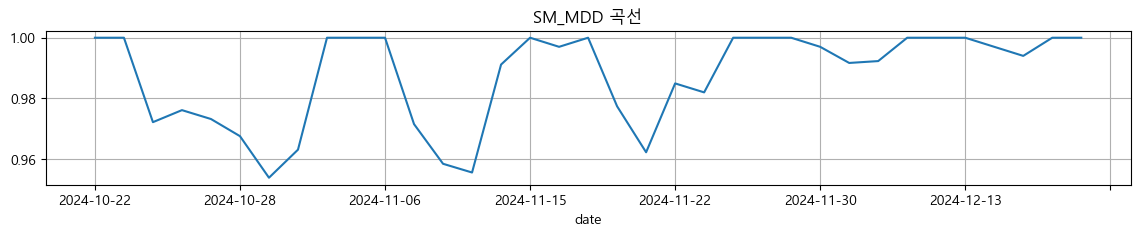

In [128]:
mdd.plot(figsize=(14,2), grid=True, title='SM_MDD 곡선');

In [129]:
print(f"SM 전체 기간 수익률 <{cumulative_return.index[0]} ~ {cumulative_return.index[-1]}>: {cumulative_return.iloc[-1]-1:.2%}")
print(f"SM 평균 주기수익률: {all_return.mean() : .2%}") 
print(f"SM 연평균 수익률: {((all_return.mean() + 1) ** 4) - 1 :.2%}")
print(f"SM 승률: {(all_return > 0).sum() / len(all_return) :.2%}")
print(f"SM 최대 낙폭 MDD: {mdd.min() - 1:.2%}")

SM 전체 기간 수익률 <2024-10-22 ~ 2024-12-23>: 37.40%
SM 평균 주기수익률:  0.94%
SM 연평균 수익률: 3.79%
SM 승률: 57.14%
SM 최대 낙폭 MDD: -4.62%


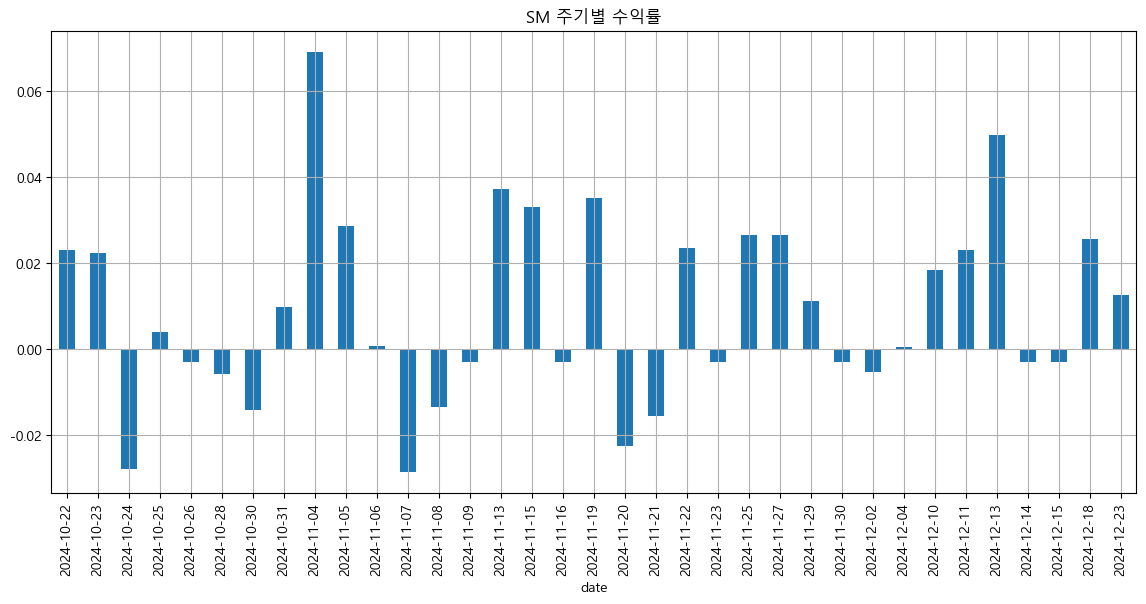

In [130]:
all_return.plot(kind='bar', grid=True, figsize=(14,6), title='SM 주기별 수익률');

### JYP 주가 데이터

In [133]:
jyp['return_rate'] = jyp['real_close'].pct_change(1).shift(-1)
jyp.set_index('date',inplace=True)

,prediction_close,real_close,up_down,return_rate
date,,,,
2024-12-07,53113.05,72595.84,상승,0.000000
2024-12-08,54632.09,72595.84,상승,0.000000
2024-12-09,55364.64,72595.84,상승,-0.073871
2024-12-10,56304.88,67233.09,하락,0.058694
2024-12-11,56205.49,71179.26,하락,0.002843
2024-12-12,56205.16,71381.63,상승,0.015593
2024-12-13,58224.70,72494.65,상승,0.027915
2024-12-14,59412.87,74518.33,상승,0.000000
2024-12-15,61409.61,74518.33,상승,0.000000


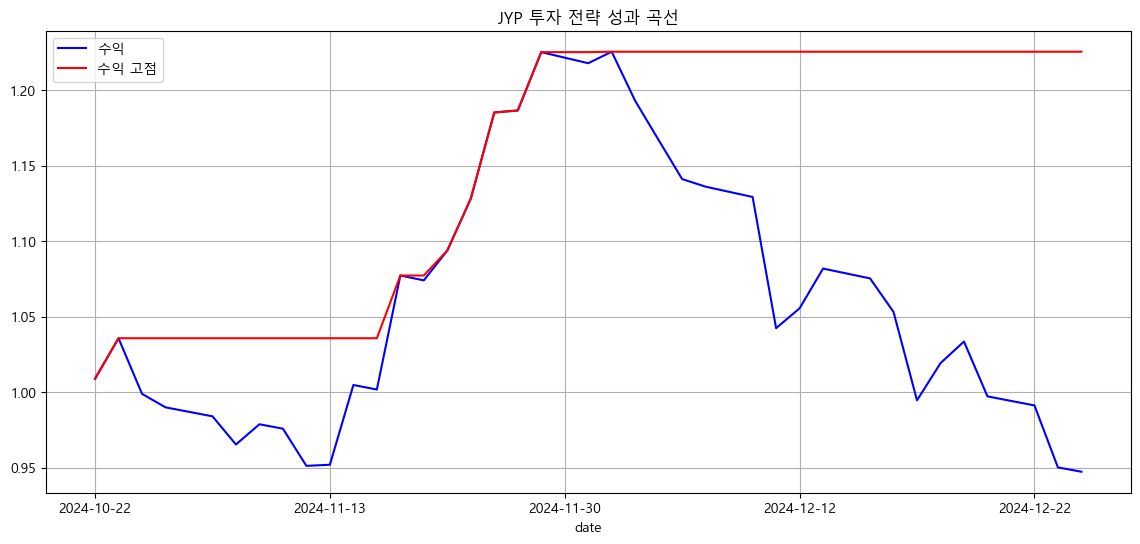

In [90]:
# 매수한 경우의 수익률만 확인
jyp_buy =jyp[jyp['up_down']=='상승']

# 레포트 및 성과지표 생성
all_return = pd.Series(jyp_buy['return_rate'], index=jyp_buy.index) - 0.003
cumulative_return = (all_return + 1.).cumprod()

cumulative_high = cumulative_return.cummax()
mdd = cumulative_return / cumulative_high

cumulative_return.plot(label = '수익',color='b');
cumulative_high.plot(figsize=(14,6), grid=True, label='수익 고점',color='r');

plt.title(r'JYP 투자 전략 성과 곡선')
plt.legend();

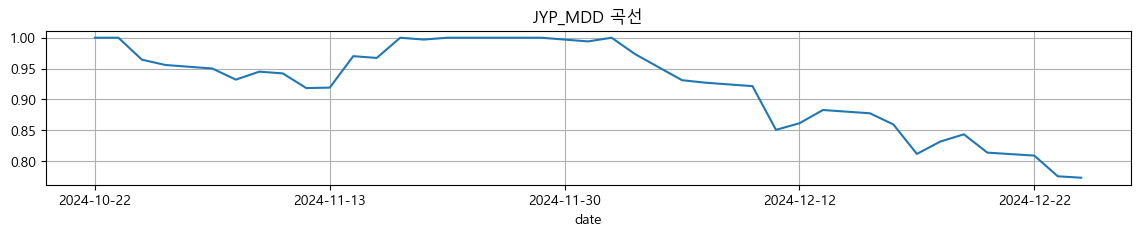

In [91]:
mdd.plot(figsize=(14,2), grid=True, title='JYP_MDD 곡선');

In [92]:
print(f"JYP 전체 기간 수익률 <{cumulative_return.index[0]} ~ {cumulative_return.index[-1]}>: {cumulative_return.iloc[-1]-1:.2%}")
print(f"JYP 평균 주기수익률: {all_return.mean() : .2%}") 
print(f"JYP 연평균 수익률: {((all_return.mean() + 1) ** 4) - 1 :.2%}")
print(f"JYP 승률: {(all_return > 0).sum() / len(all_return) :.2%}")
print(f"JYP 최대 낙폭 MDD: {mdd.min() - 1:.2%}")

JYP 전체 기간 수익률 <2024-10-22 ~ 2024-12-25>: -5.26%
JYP 평균 주기수익률: -0.09%
JYP 연평균 수익률: -0.35%
JYP 승률: 37.21%
JYP 최대 낙폭 MDD: -22.68%


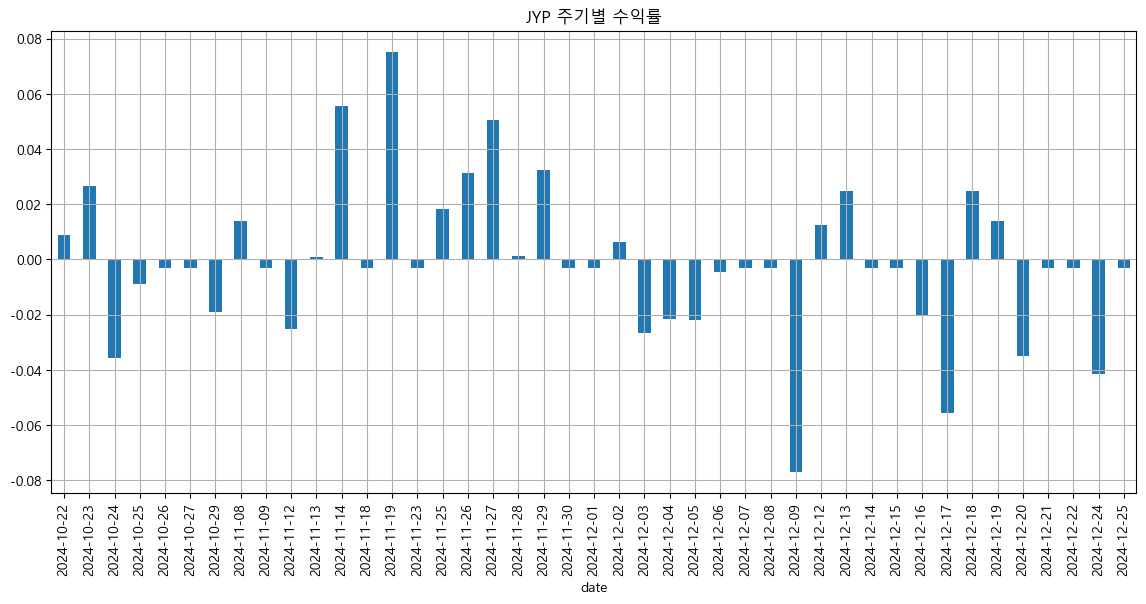

In [93]:
all_return.plot(kind='bar', grid=True, figsize=(14,6), title='JYP 주기별 수익률');

### HYBE

In [134]:
hybe['return_rate'] = hybe['real_close'].pct_change(1).shift(-1)
hybe.set_index('date',inplace=True)

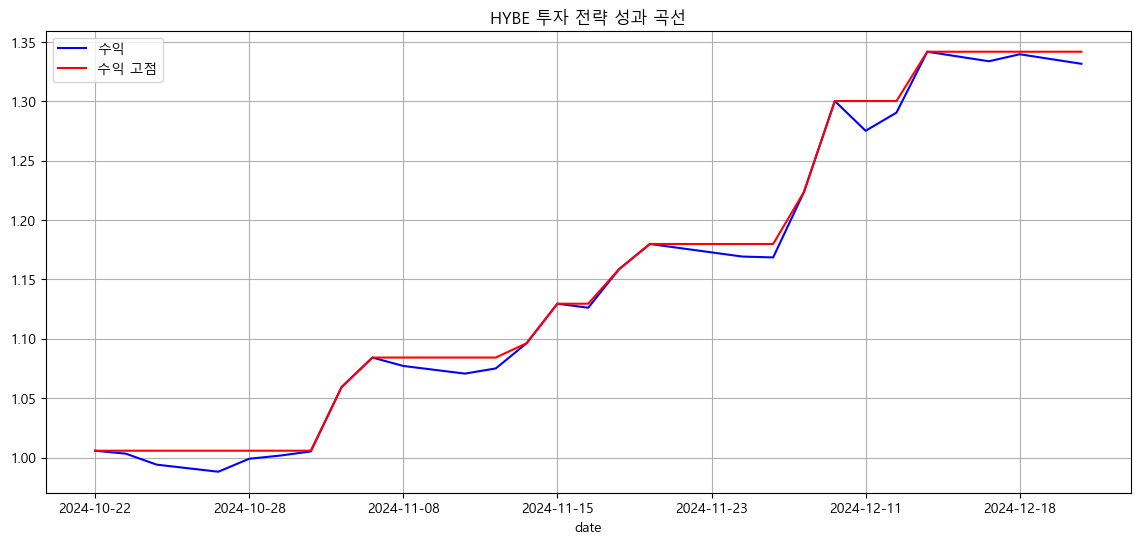

In [135]:

# 매수한 경우의 수익률만 확인
hybe_buy =hybe[hybe['up_down']=='상승']

# 레포트 및 성과지표 생성
all_return = pd.Series(hybe_buy['return_rate'], index=hybe_buy.index) - 0.003
cumulative_return = (all_return + 1.).cumprod()

cumulative_high = cumulative_return.cummax()
mdd = cumulative_return / cumulative_high

cumulative_return.plot(label = '수익',color='b');
cumulative_high.plot(figsize=(14,6), grid=True, label='수익 고점',color='r');

plt.title(r'HYBE 투자 전략 성과 곡선')
plt.legend();

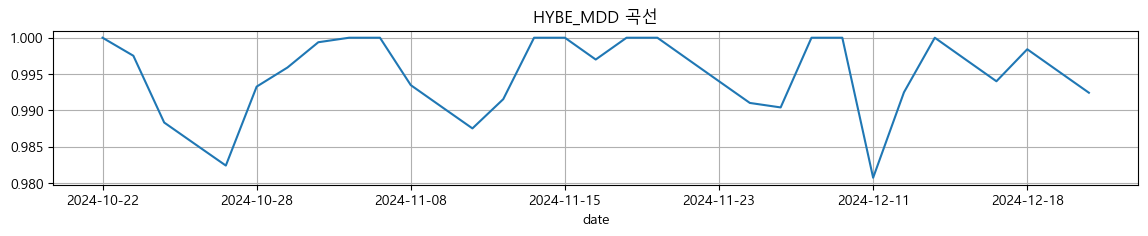

In [136]:
mdd.plot(figsize=(14,2), grid=True, title='HYBE_MDD 곡선');

In [137]:
print(f"HYBE 전체 기간 수익률 <{cumulative_return.index[0]} ~ {cumulative_return.index[-1]}>: {cumulative_return.iloc[-1]-1:.2%}")
print(f"HYBE 평균 주기수익률: {all_return.mean() : .2%}") 
print(f"HYBE 연평균 수익률: {((all_return.mean() + 1) ** 4) - 1 :.2%}")
print(f"HYBE 승률: {(all_return > 0).sum() / len(all_return) :.2%}")
print(f"HYBE 최대 낙폭 MDD: {mdd.min() - 1:.2%}")

HYBE 전체 기간 수익률 <2024-10-22 ~ 2024-12-25>: 33.16%
HYBE 평균 주기수익률:  0.89%
HYBE 연평균 수익률: 3.61%
HYBE 승률: 48.48%
HYBE 최대 낙폭 MDD: -1.93%


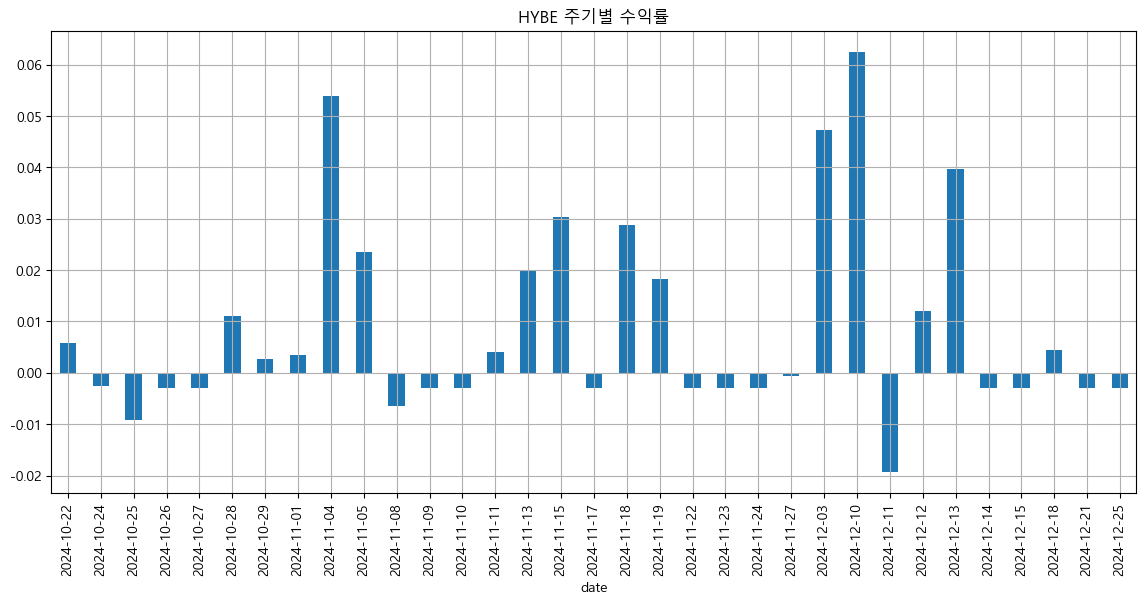

In [138]:
all_return.plot(kind='bar', grid=True, figsize=(14,6), title='HYBE 주기별 수익률');